In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 400

## Figure 2

In [2]:
## data processing
metadata = pd.read_csv("../data/sri_lanka_metadata.txt", sep="\t")
metadata = metadata.rename(columns={"Sample": "IID", "City": "City"})
metadata["salinity (ppm)"] = metadata["Phenotype"].str.extract("(\d*)").astype(int)

PC = pd.read_csv("../data/pca/plink.eigenvec", sep="\t")
PC_data = pd.merge(PC, metadata, on="IID", how="left")
PC_data = PC_data.rename(columns={"PC1": "PC1 (12.12%)", "PC2": "PC2 (6.4%)"})
PC_data["salinity (ppm)"] = pd.to_numeric(PC_data["salinity (ppm)"])
PC_data["Water Type"] = (PC_data["salinity (ppm)"] > 0).replace({True: "Brackish", False: "Fresh"})
PC_data = PC_data.sort_values(by="City")
PC_data['City'] = PC_data['FID'].replace('Jaffna', 'Jaffna City')

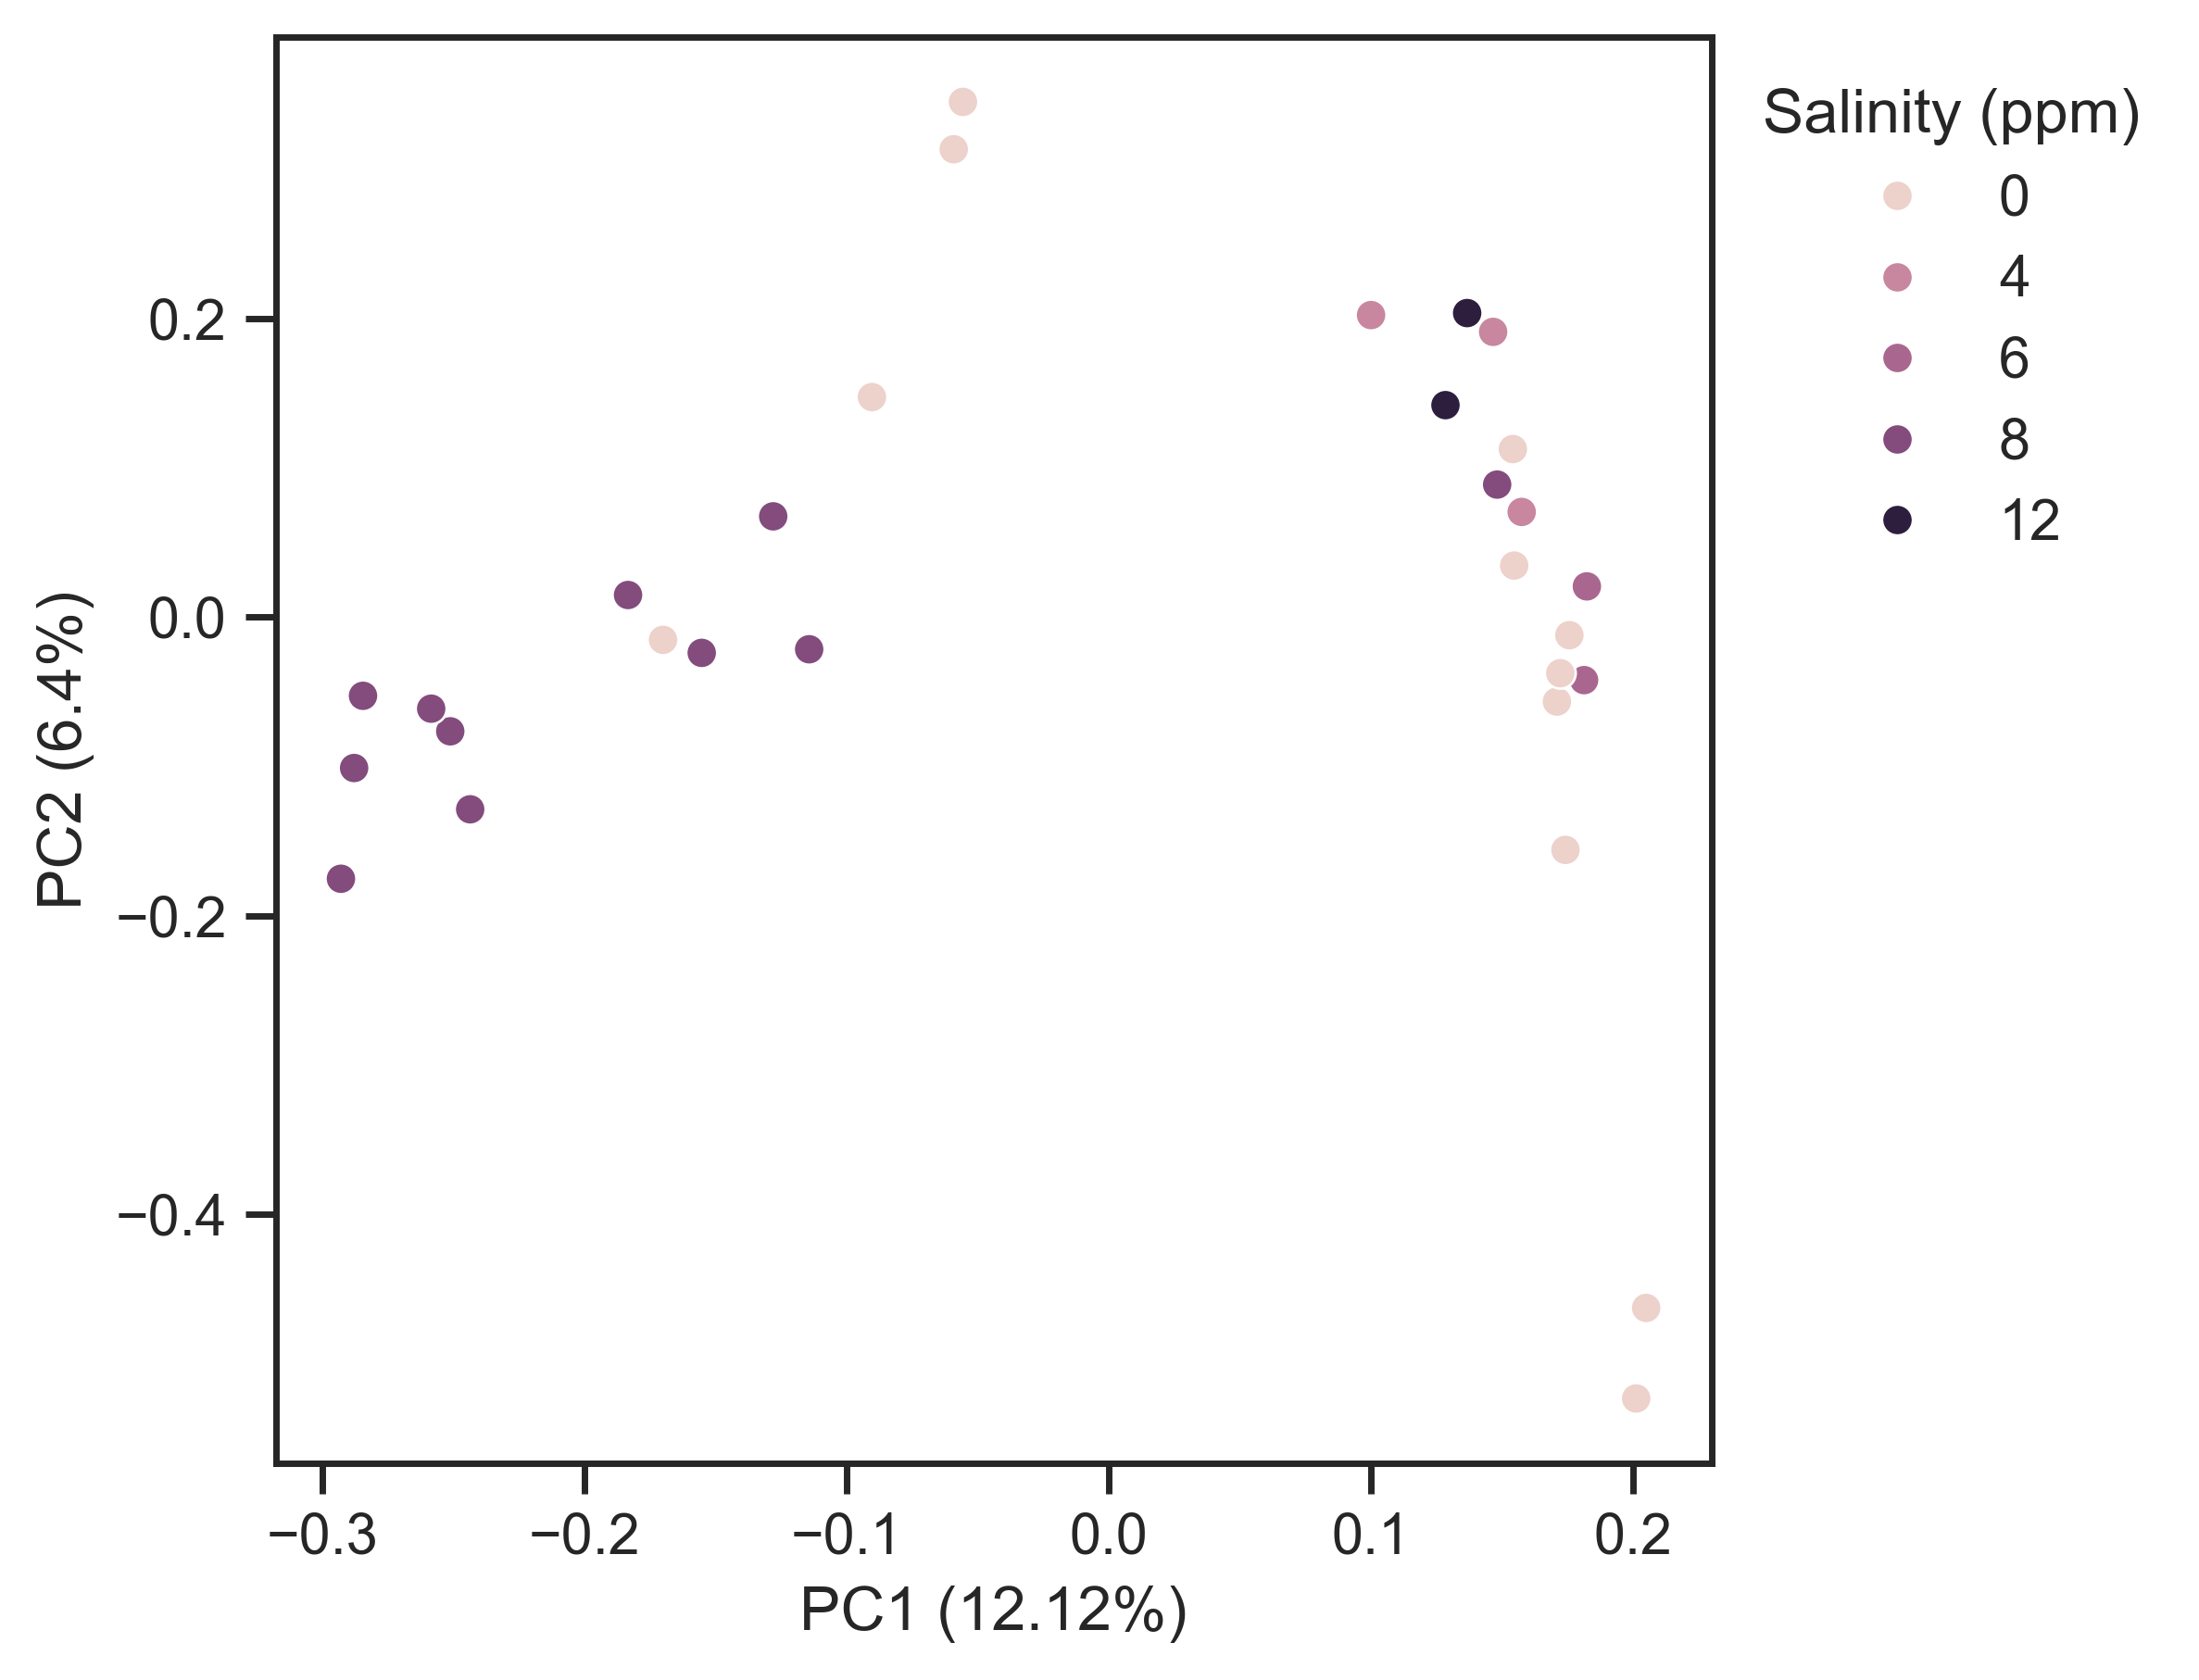

In [4]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.set_style("ticks")
ax = sns.scatterplot(data=PC_data, x="PC1 (12.12%)", y="PC2 (6.4%)", hue="salinity (ppm)")
plt.legend(title="Salinity (ppm)", frameon=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

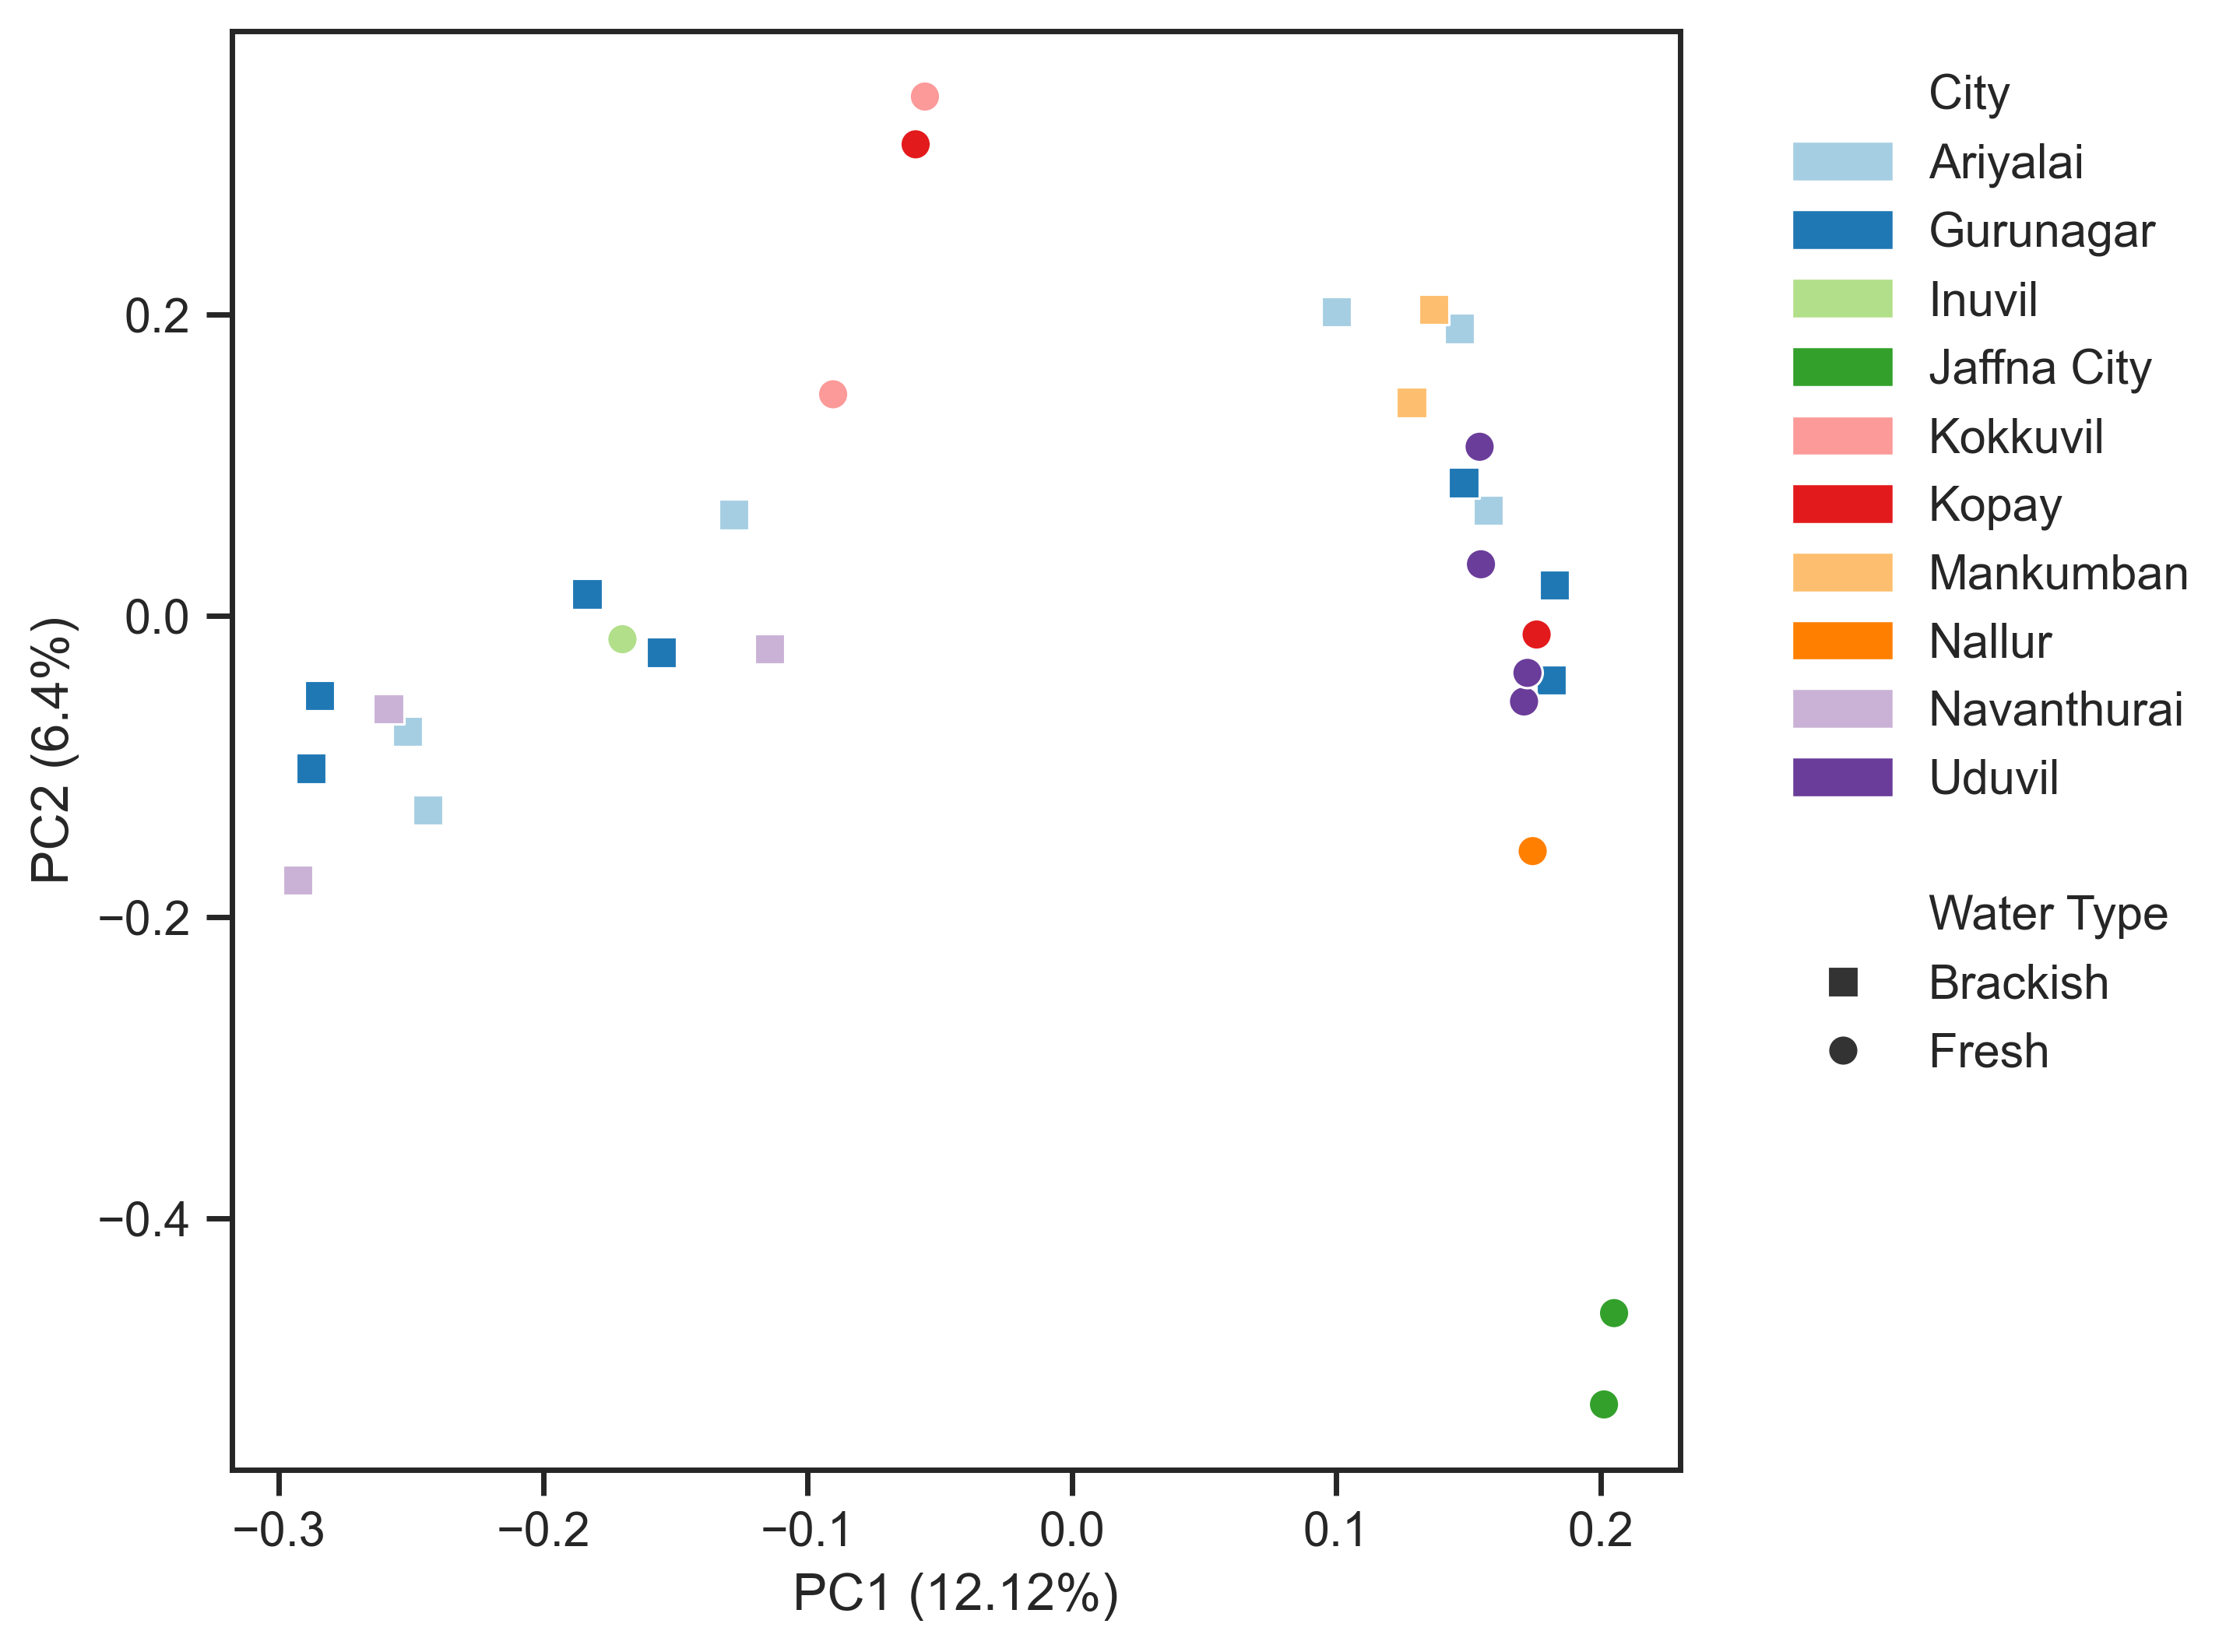

In [5]:
import matplotlib.patches as mpatches

sns.set(rc = {'figure.figsize':(6,6)})
sns.set_style("ticks")
sns.set_palette("Paired")
ax = sns.scatterplot(data=PC_data, x="PC1 (12.12%)", y="PC2 (6.4%)", hue="City", style="Water Type", s=50, markers=["s", "o"])

legends = ax.legend()
custom_legend = [mpatches.Patch(color="white", label="City")]
for j, obj in enumerate(legends.get_texts()[1:11]):
    custom_legend.append(mpatches.Patch(color=sns.color_palette("Paired")[j], label=obj.get_text()))
handles, labels = ax.get_legend_handles_labels()

custom_legend.append(mpatches.Patch(color="white", label=""))
custom_legend.append(mpatches.Patch(color="white", label="Water Type"))
custom_legend.append(handles[-2])
custom_legend.append(handles[-1])

ax.legend(handles=custom_legend, frameon=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))

plt.show()